## Takes registered, merged, cropped images and do matching pursuit

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path
import numpy as np
import os
import sys
import glob
import pandas as pd
import xml.etree.ElementTree as et
#from ims_to_tiff import convert_to_tif
import datetime
from imageio import volread as imread

import tifffile

#from pystackreg import StackReg
from skimage.filters import threshold_otsu

import seaborn as sns
#from pystackreg.util import to_uint16


In [2]:
img=imread('F00.tif')

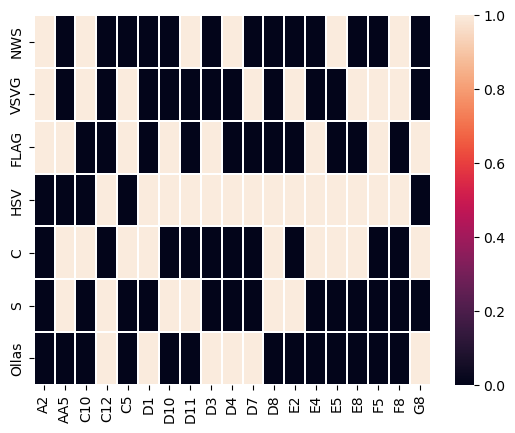

In [2]:
# load metadata - load full codebook as well
codebook = pd.read_csv('codebook.csv',sep='.',index_col=0) # this is "legal" codebook
#AllProcodes = pd.read_csv('AllProcodes.csv', sep='.')
sns.heatmap(codebook, linewidths = 0.3)
markers = pd.read_csv('./markers.csv')

In [3]:
codebook = codebook[['A2','AA5','D4']]
codebook

,A2,AA5,D4
NWS,1.0,0.0,1.0
VSVG,1.0,0.0,0.0
FLAG,1.0,1.0,0.0
HSV,0.0,0.0,1.0
C,0.0,1.0,0.0
S,0.0,1.0,0.0
Ollas,0.0,0.0,1.0


In [5]:
x=np.array([0.9, 0.8, 0.95, 0.3, 0.2, 0.1, 0.7])
x=x.reshape((7,1))
x.shape

(7, 1)

In [8]:
A=codebook.values.copy().T
print(A.shape)
A = A / np.linalg.norm(A,axis=1)[:,None]
A.shape

(3, 7)


(3, 7)

In [12]:
Ax=A @ x

In [10]:
z = np.zeros((A.shape[0],*x.shape[1:]))
z.shape

(3, 1)

In [13]:
k_max=Ax.argmax(0)
k_max

array([0])

In [14]:
z[k_max] = Ax[k_max]
z

array([[1.52997821],
       [0.        ],
       [0.        ]])

In [15]:
x = x-A[k_max].T*z[k_max]
x

array([[ 0.01666667],
       [-0.08333333],
       [ 0.06666667],
       [ 0.3       ],
       [ 0.2       ],
       [ 0.1       ],
       [ 0.7       ]])

In [17]:
Ax=A@x
k_max=Ax.argmax(0)
z[k_max] = Ax[k_max]
z

array([[1.52997821],
       [0.        ],
       [0.58697277]])

In [18]:
x = x-A[k_max].T*z[k_max]
x

array([[-0.32222222],
       [-0.08333333],
       [ 0.06666667],
       [-0.03888889],
       [ 0.2       ],
       [ 0.1       ],
       [ 0.36111111]])

In [16]:
x_norm = np.linalg.norm(x, axis=0, ord=2)
x_norm

array([0.80104099])

In [7]:


Ax = A @ x[:,active_set]
        # pick index with max projection
k_max = Ax.argmax(0)
        # set it to active
z[k_max,active_set] = Ax[k_max,range(len(k_max))]
        # subtract off contribution
x[:,active_set] -= A[k_max].T * z[k_max,active_set]
        # mark pixels with sufficiently small residual norm as done
x_norm = np.linalg.norm(x,axis=0,ord=2)
active_set[x_norm<max_norm] &= False
        
A = codebook.values.copy().T

NameError: name 'A' is not defined

In [4]:
img = imread('F00.tif')
img.shape # 4 D numpy matrix, Z, C, Y, X

(15, 24, 2042, 2043)

In [5]:
markers 

,channel_number,cycle_number,marker_name,Filter,excitation_wavelength,emission_wavelength,Bandwidth,ch_index,Split_Num
0,1,0,DNA_0,DAPI,405,445,46,0,0
1,2,0,Blank_488_0,GFP,488,521,38,1,1
2,3,0,Blank_561_0,RFP,561,594,43,2,2
3,4,0,Blank_637_0,Cy5,637,698,77,3,3
4,5,1,DNA_1,DAPI,405,445,46,0,4
5,6,1,NWS,GFP,488,521,38,1,5
6,7,1,VSVG,RFP,561,594,43,2,6
7,8,1,AU1,Cy5,637,698,77,3,7
8,9,2,DNA_2,DAPI,405,445,46,0,8
9,10,2,HSV,GFP,488,521,38,1,9


In [22]:
## Transform img to background subtracted, subset by channels of interest, 

## plot results (use subplots to plot all channels of interest) --> plot maximum projections, plot at z=0,7, 15? (most-focused z plane)
## first 3 images

## manually identify few cells with their identity

## save all transformed images
print(os.getcwd())
allFOVs = sorted(glob.glob(f'./*'))
allFOVs = [x.split('/')[1] for x in allFOVs]
allFOVs
## transpose back to ZCYX format
## tifffile.imwrite(filename, img_transformed, imagej=True, photometric='minisblack',metadata={'axes':'ZCYX'})

/run/user/1000/gvfs/afp-volume:host=FraenkelNAS.local,volume=imagestore/Brian/032922_A2D4AA5_ST5_D28


['F00.tif',
 'F01.tif',
 'F02.tif',
 'F03.tif',
 'F04.tif',
 'F05.tif',
 'F06.tif',
 'F07.tif',
 'F08.tif',
 'F09.tif',
 'F10.tif',
 'F11.tif',
 'F12.tif',
 'F13.tif',
 'F14.tif',
 'F15.tif',
 'F16.tif',
 'F17.tif',
 'F18.tif',
 'F19.tif',
 'F20.tif',
 'F21.tif',
 'F22.tif',
 'F23.tif',
 'F24.tif',
 'F25.tif',
 'F26.tif',
 'F27.tif',
 'F28.tif',
 'F29.tif',
 'F30.tif',
 'F31.tif',
 'F32.tif',
 'F33.tif',
 'F34.tif',
 'F35.tif',
 'F36.tif',
 'F37.tif',
 'F38.tif',
 'F39.tif',
 'F40.tif',
 'F41.tif',
 'F42.tif',
 'F43.tif',
 'F44.tif',
 'F45.tif',
 'F46.tif',
 'F47.tif',
 'F48.tif',
 'Matching Pursuit_GroundTruthVer-Copy1.ipynb',
 'Matching Pursuit_GroundTruthVer.ipynb',
 'codebook.csv',
 'markers.csv']

In [24]:
fov = '00'
fname = f'./transformed/F{fov}_transformed.tif'
fname

# load saved images and check if image is correct


'./transformed/F00_transformed.tif'

In [9]:
img[6,5,...].max()

14148

In [ ]:
fig,axs=plt.subplots(2,4,figsize=(20,10))
axs=axs.ravel()
for k in range(img.shape[0]):
    if k < 7:
        axs[k].imshow(img.max(0)[k,:500, :500], vmin=np.quantile(img.max(1)[k], 0.05), 
                      vmax=np.quantile(x.max(1)[k], 0.99), cmap = 'gray')
        axs[k].set_title(codebook.index[k])
fig.subplots_adjust(hspace=0)

In [5]:
# MP utils - from here on, images will be float. 

# img: merged image according to markers.csv info. load uint16 images of registered, merged.
# codebook : legal / full codebook.
def prepare_MPinput(img, codebook, markers):
    from skimage.filters import median
    from skimage.morphology import disk

    if img.dtype != np.float32:
        img = img.astype(np.float32)
    
    if img.shape[0] != len(markers.index.tolist()):
        img = img.transpose(1,0,2,3)
    assert img.shape[0] == len(markers.index.tolist()), 'image input should be transposed to CZYX'
    
    ## Background Subtraction ## ALL CHANNELS except DNA channels
    for ch in range(4, img.shape[0]):
        r = ch%4
        if r == 1: # 488 channel # green
            img[ch,...] = img[ch,...] - img[1,...] # subtract background 
     
        elif r == 2: # 555 channel # yellow
            img[ch,...] = img[ch,...] - img[2,...] # subtract background 
    
        elif r == 3: # 637 channel # red 
            img[ch,...] = img[ch,...] - img[3,...] # subtract background 
        
        img[img<0] = 0 # clip negatives 
    
    ### THIS IS IMPORTANT -- do median filter of only EPITOPE channels.
    img = img[markers['marker_name'].isin(codebook.index)]
 
    # median filter - ####### DO IT before calculating quantiles
    # median filter of only epitope channels !!!! 
    #_img = np.zeros(np.shape(img), dtype = np.float32)
    #for C in range(img.shape[0]):
    #    for Z in range(img.shape[1]):
    #        _img[C,Z,...] = median(img[C,Z,...], disk(1))

    # calculate normalization factors
    img_min = np.quantile(_img,0.75,(1,2,3),keepdims=True) # most of each channel is probably background
    img_max = np.quantile(_img,0.999,(1,2,3),keepdims=True)      
    img = (img.astype(np.float32) - img_min) / (img_max - img_min)
    img = img.clip(0,1) # clip negatives 
    return img # bcg subtracted, epitope channel selected, median filtered and min/max normalized 
    

# approximately solve min_z ||zA-x||^2_2 st ||z||_0 <= max_iters
def matching_pursuit(x, A, max_iters, thr=1):
    # this is necessary if doing more than one iteration, for the residuals update to work
    from skimage.filters import threshold_otsu
    A = A / np.linalg.norm(A,axis=1)[:,None]

    z = np.zeros((A.shape[0],*x.shape[1:]))

    x = x.copy() # initialize "residuals" to the image itself

    # mask for whether each pixel has converged or not; we already know background's zero
    active_set = np.ones(x.shape[1:],dtype=bool)
    x_norm = np.linalg.norm(x,axis=0,ord=2)

    # one approåçach: pick it using the otsu threshold, as estimate of noise level
    max_norm = threshold_otsu(x_norm)
#     max_norm = [threshold_otsu(x_norm[k]) for k in range(x_norm.shape[0])]
#     max_norm = np.array(max_norm)[:,None,None]
    max_norm *= thr # hack; otsu just not great. see 'enhance neurites' in CellProfiler?
    active_set[x_norm <= max_norm] = False

    for t in range(max_iters):
        # project dictionary on residual image
        Ax = A @ x[:,active_set]
        # pick index with max projection
        k_max = Ax.argmax(0)
        # set it to active
        z[k_max,active_set] = Ax[k_max,range(len(k_max))]
        # subtract off contribution
        x[:,active_set] -= A[k_max].T * z[k_max,active_set]
        # mark pixels with sufficiently small residual norm as done
        x_norm = np.linalg.norm(x,axis=0,ord=2)
        active_set[x_norm<max_norm] &= False
        
    return z
## Don't do this at this step ## 
def normalize_MPscore(z):
    p=np.zeros(np.shape(z.max(1))) # from CZYX --> max project to create CYX
    z = np.nan_to_num(z) # replace nan values to 0
    norm_fact = z.max(1).max(0) # max proj, then calculate normalization factor
    # normalization factor here is the maximum value across barcodes (channels)
    
    # normalize, avoiding divison by zero
    p = np.divide(z.max(1), norm_fact, out=np.zeros(z.max(1).shape, dtype = 'float32'), where=norm_fact!=0) 
    return p

In [ ]:
# TEST RUN, from img loading to normalized, Max-proj probability maps
#check input again
codebook = pd.read_csv('codebook.csv',sep='.',index_col=0) # this is "legal" codebook
codebook = codebook[['A2','AA5','D4']]
idx = codebook.index.tolist()
idx.pop(2)
codebook = codebook.reindex(idx + ['FLAG'])
sns.heatmap(codebook, linewidths = 0.3)

markers = pd.read_csv('./markers.csv')

img = imread('F00.tif')

# define MP inputs
x = prepare_MPinput(img, codebook, markers)
A = codebook.values.copy().T



In [ ]:
print(x.shape)
print(A.shape)

In [ ]:
# define MP params
assert len(x.shape) == 4
max_components = 3 # assuming maximum of three overlapping neurites..
fudge_factor = 0.25

# run MP
z = matching_pursuit(x, A, max_components, fudge_factor)
z = z.clip(0,np.inf)

# run MP normalization, 2D max projection
#p = normalize_MPscore(z)

In [39]:
z.shape

(3, 15, 2042, 2043)

/home/bkang/anaconda3/envs/author/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("tab20"))
  


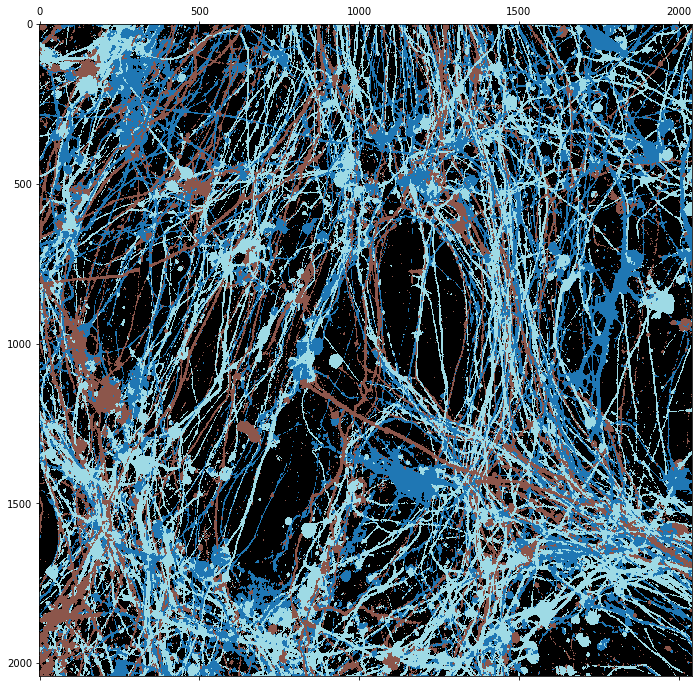

In [40]:
cm = plt.get_cmap('tab20')
cm.set_bad('k')
plt.figure(figsize=(12,12))
plt.gca().matshow(np.where(z.max(1).max(0)==0,np.nan,z.max(1).argmax(0)),cmap=cm)

In [ ]:
cm = plt.get_cmap('tab20')
cm.set_bad('k')
plt.figure(figsize=(12,12))
plt.gca().matshow(np.where(z.max(1).max(0)==0,np.nan,z.max(1).argmax(0)),cmap=cm)

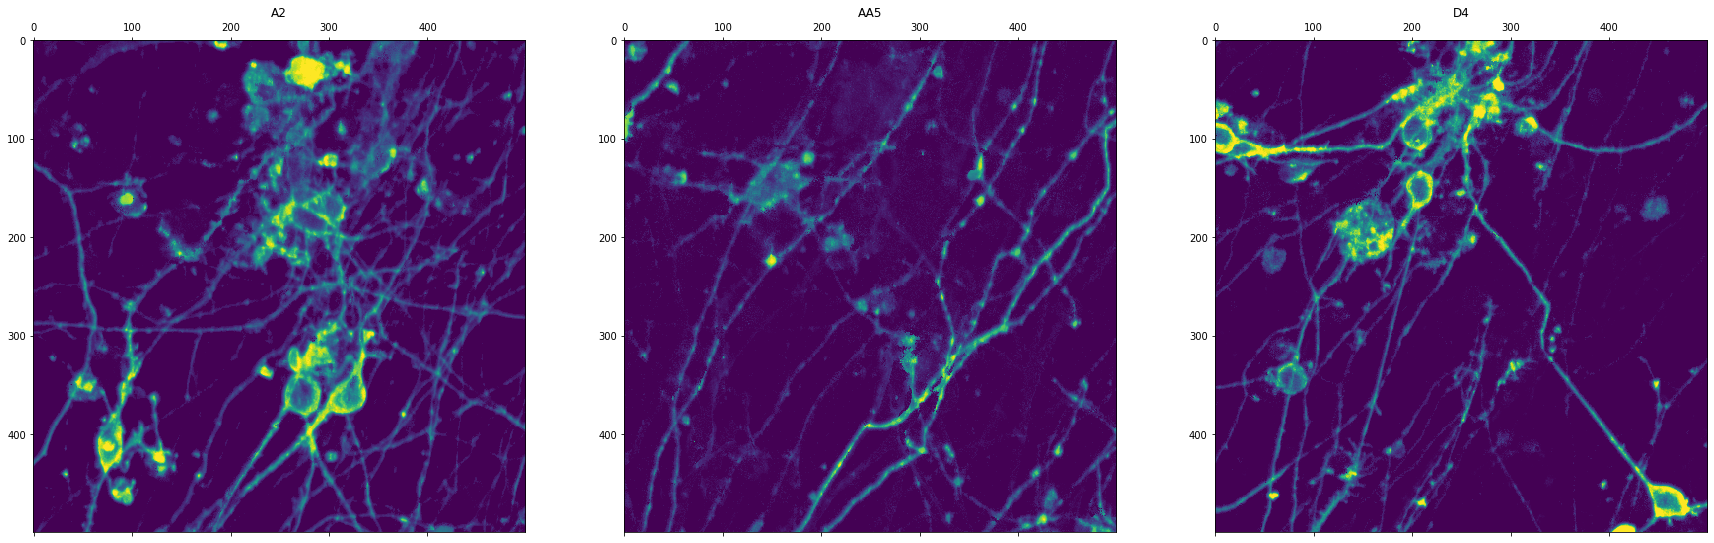

In [41]:
# plot by Procodes
fig,axs=plt.subplots(1,3,figsize=(30,10))
axs=axs.ravel()
for k in range(z.shape[0]):
    axs[k].matshow(z.max(1)[k,:500,:500])
    axs[k].set_title(codebook.columns[k])
    axs[k].titlesize='medium'

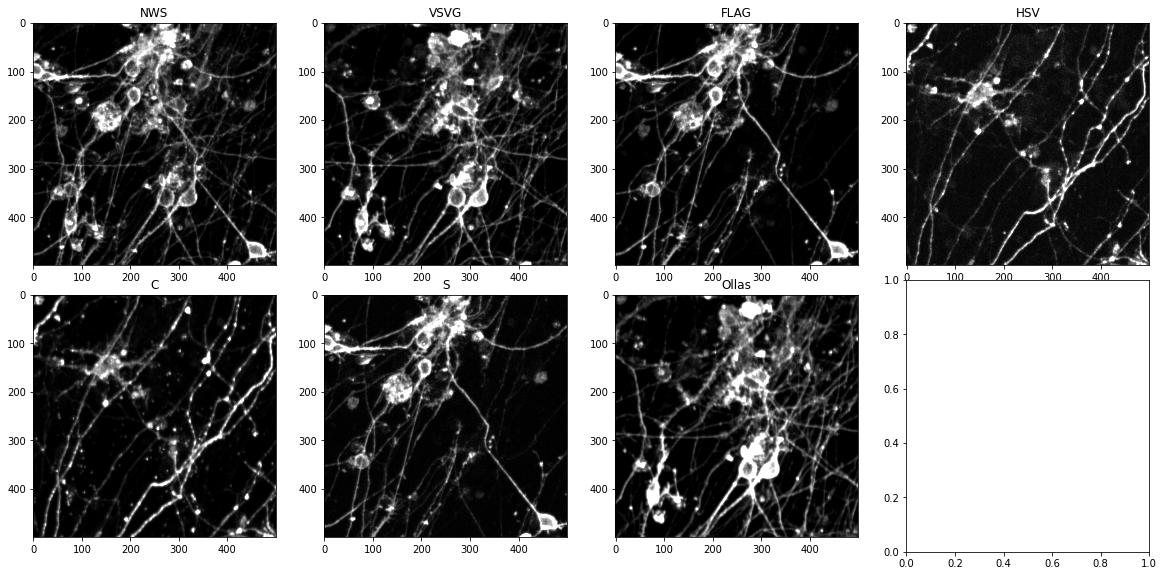

In [31]:
fig,axs=plt.subplots(2,4,figsize=(20,10))
axs=axs.ravel()
for k in range(img.shape[0]):
    if k < 7:
        axs[k].imshow(x.max(1)[k,:500, :500], vmin=np.quantile(x.max(1)[k], 0.05), 
                      vmax=np.quantile(x.max(1)[k], 0.99), cmap = 'gray')
        axs[k].set_title(codebook.index[k])
fig.subplots_adjust(hspace=0)

In [30]:
x.shape

(7, 15, 2042, 2043)

In [32]:
codebook.index

Index(['NWS', 'VSVG', 'FLAG', 'HSV', 'C', 'S', 'Ollas'], dtype='object')